In [1]:
%matplotlib inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

# Introduction to Ensemble Methods

Ensemble methods are techniques for obtaining better predictive performances by using multiple models.

To get an overview of the methods we are going to see today, you can watch this video of Machine learnia about Ensemble learning : https://www.youtube.com/watch?v=7C_YpudYtw8 (you don't need to understand everything before beginning the notebook ;)).

The following dataset comes from a bank which would like to know when a new client arrives if this client will subscribe to a long term deposit.

The bank will be considered as your client in the following parts.

---

**Feel free to create sklearn Pipelines for simplifying the following experiments** 

## Introducing and exploring the dataset

The dataset is located in `../data/bank-full.csv`. It has 17 columns, the target column or $ŷ$ is the column named `y`.

Columns summary  : 

| column name | simple description |
|-------------|------------------------|
| age | age |
| job | type of job |
| marital | marital status |
| education | education level |
| default | has credit in default? |
| balance | average yearly balance, in euros  |
| housing | has housing loan? |
| loan | has personal loan? |
| contact | contact communication |
| month | last contact month of year |
| day_of_week | last contact day of the week |
| duration |  last contact duration in seconds |
| campaign |  number of contacts performed during campaign for this client |
| pday | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client |
| poutcome | outcome of the previous marketing campaign |
| **output :** |  |
| y | has  the client subscribed a term deposit? |

Let's explore the dataset a bit using pandas.

While exploring the dataset it is recommended to create a list of categorical features

In [2]:
import pandas as pd
import numpy as np

Create a dataframe with the dataset `../data/bank-full.csv`

In [3]:
# code here
bank_df = pd.read_csv('../data/bank-full.csv', sep=';')
bank_df.tail(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Describe the dataset informations

In [5]:
# code here
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Use histogramms to display the features' distribution

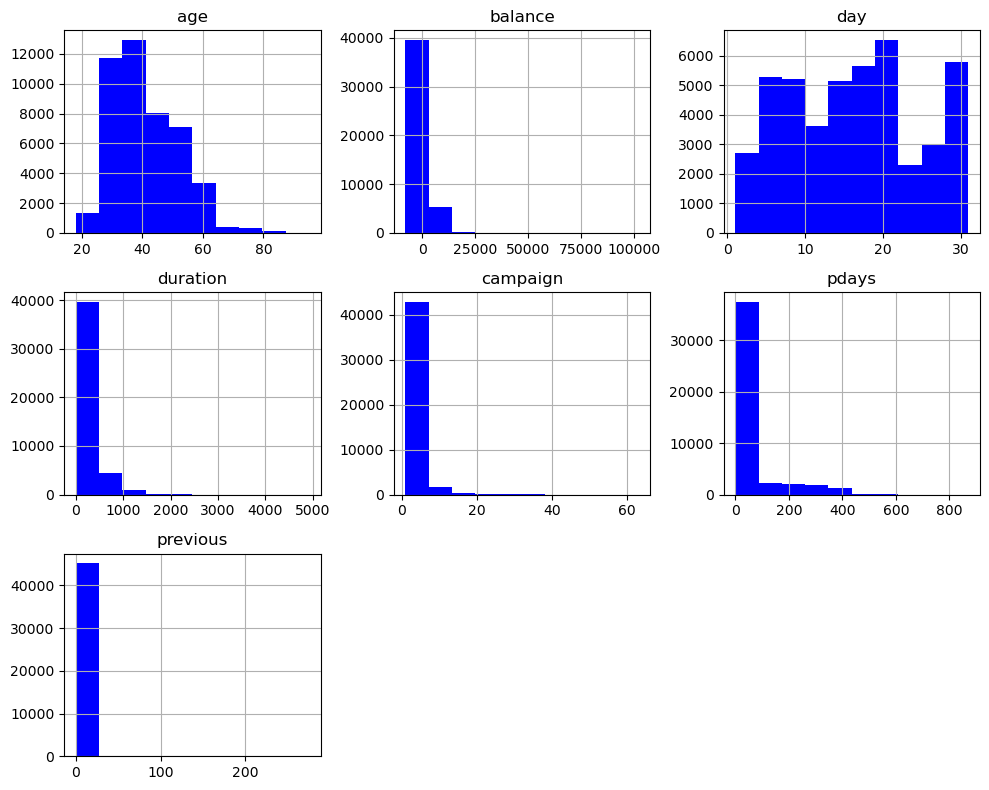

In [6]:
# code here
rcParams['figure.figsize'] = 10,8
plots = bank_df.hist(color='blue')
plt.tight_layout()

In [7]:
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
bank_num_df = bank_df[numerical_features]

Use heatmap to display the numerical features' correlation

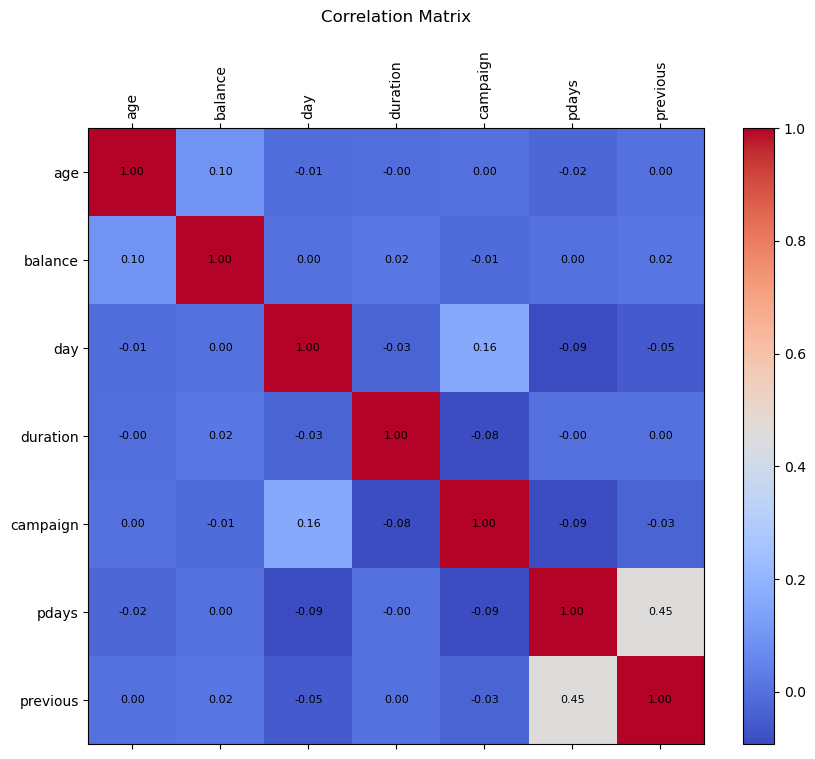

In [8]:
# code here
corr = bank_num_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr, cmap='coolwarm')

# Add colorbar
fig.colorbar(cax)

# Set ticks and labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# Annotate each cell
for (i, j), val in np.ndenumerate(corr):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black', fontsize=8)

plt.title("Correlation Matrix", pad=20)
plt.show()

Hop hop hop!!! Not to fast!! Before processing data for machine learning, do you think that all the data are useful?  
As an expert, I tell you you should removed the duration column!!

Could you tell me why?

💡*think first, but if you have no idea double click here.*
<!-- When do your calls last the most? --> 
`This is because naturally, longer calls usually happens when customers are interested in a product while shorter calls (e.g. 10 seconds) often means the customer hung up quickly (not interested). This means duration can be highly predictive of whether the client eventually subscribe to the term deposit or not.`

`Also, when you predict whether a new customer will subscribe, you don't know yet how long their future phone call will last. The duration feature is only known after the call is made. Using it to train our model means the model is "peeking into the future" - which is a classical example of data leakage.`

In [9]:
# remove duration column
bank_df = bank_df.drop("duration", axis=1)
bank_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


The date is a strange type of data for machine learning. Think about it. Is the day? the month? the year that are important? Or the relative date for instance in the year?

If the phenomenon occurs seasonally, maybe it is better to look at the day of the year (on 365 days), if it monthly, maybe to look at the day in the month (on approximativally 30, 31 or other for bissextile year), etc... If more complex, well do the proper hypothesis and test it.

For our problem, we supposed it is better to look at the day of the year. Maybe it is a good hypothesis, maybe not. It is an hypothesis we want you to test. So in order to continue the preprocessing, the features `day` and `month` should be merged into one column named `dayoftheyear`. 

You can use pandas datetime tools or python **datetime** librairies for doing this preprocessing. To find the the day of year, look as *dayofyear* method from **datetime** library and examples such as https://pythonguides.com/extract-day-number-of-the-year-from-a-date-in-python/ or https://docs.lucee.org/reference/functions/dayofyear.html
(the default year used will be 1984)

In [10]:
bank_df['date'] = '1984'+'-'+bank_df['month']+'-'+(bank_df['day']).astype(str)
bank_df = bank_df.drop(columns = ['day', 'month'])
bank_df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,date
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,1984-may-5
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no,1984-may-5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,1984-may-5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no,1984-may-5


In [11]:
#code here
# You can concatenate multiple Series containing string by just summing them.
# However, be sure each Serie contains string, in case use .astype(str)
#import datetime

# Convert to datetime
date_input = pd.to_datetime(bank_df['date'], format="%Y-%b-%d")

# Extyract the day of the year
dayoftheyear = date_input.dt.dayofyear

bank_df['dayoftheyear'] = dayoftheyear

bank_df = bank_df.drop('date', axis=1)
bank_df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,dayoftheyear
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,126
1,44,technician,single,secondary,no,29,yes,no,unknown,1,-1,0,unknown,no,126
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,126
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,1,-1,0,unknown,no,126


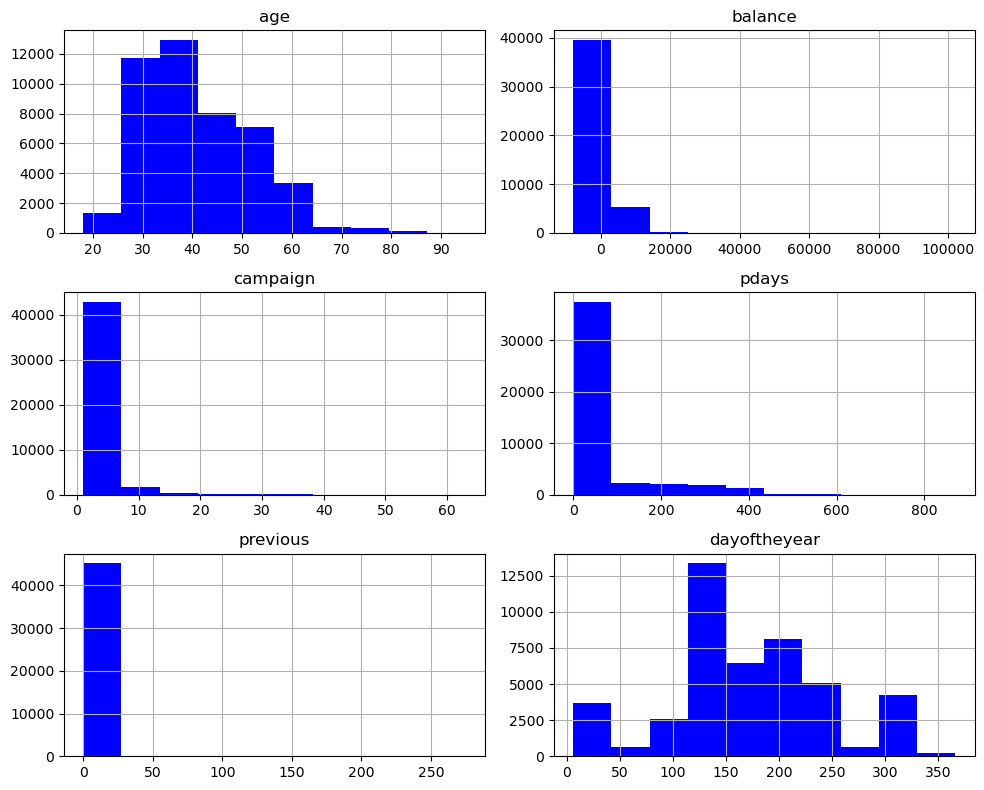

In [12]:
rcParams['figure.figsize'] = 10, 8
plots = bank_df.hist(color='blue')
plt.tight_layout()

We cannot treat the same way categories with numerical features. So let's make two different lists and different treatments. 

Now sort the features into categorical and numerical features

In [13]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome'] # to be completed
numerical_features=['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear'] # to be completed
print(numerical_features)

['age', 'balance', 'campaign', 'pdays', 'previous', 'dayoftheyear']


After a first exploration, categorical/ordinal features (8 columns) need to be encoded in order to become a valid input for the modeling phase. ML manipulates figures, not string, not category by itself.

Look at the encoder to *encode* your *categorical data*. The different encoders can be found [here](https://scikit-learn.org/stable/api/sklearn.preprocessing.html).

(You can also use the function `gethg_dummies` of pandas for categorical features)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split 
# Create the X and y DataFrames resample the dataframes if necessary
X = bank_df.drop('y', axis=1)
y = bank_df['y'].map({'no': 0, 'yes': 1})

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape:{y.shape}")

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numerical_features),
        ('category', OneHotEncoder(drop='first'), categorical_features)
]
) # Added drop = 'first' to the OneHotEncoder option in order to avoid Multicolinearity
# sparse_output = False will retuen a dense array instead of sparse matrix for compatibility

# train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=41, 
    stratify=y
)
print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Feature matrix shape: (45211, 14)
Target vector shape:(45211,)

Train set: 31647 samples
Test set: 13564 samples


In [15]:
# import and create the appropriate transformers
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

At the end of this part, two dataframes are created :

- `X` containing the features (or the matrix $X$)
- `y` containing the label (or $ŷ$)

Well done! The data is now ready to be splitted into sets and used to train models!

## Modelling phase

The client needs two features :

1. A model, which can be updated without performance loss. In other word, it means a pipeline easy to use and evaluate.
2. A model, that performs well.

### Dummy Classifier

It is always a good idea to begin with a dummy model as a baseline

In [16]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score

# Code here to get dummy classifier F1score and accuracy
print("\n" + "="*60)
print("DUMMY CLASSIFIER BASELINE")
print("="*60)
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=41)
dummy_clf.fit(X_train_prep, y_train)
y_pred_dummy = dummy_clf.predict(X_test_prep)

print(f"Dummy Classifier f1-score = {f1_score(y_test, y_pred_dummy):.4f}")
print(f"Dummy Classifier Accuracy = {accuracy_score(y_test, y_pred_dummy):.4f}")



DUMMY CLASSIFIER BASELINE
Dummy Classifier f1-score = 0.0000
Dummy Classifier Accuracy = 0.8830


### Simple Decision Tree

We will experiment both feature by doing the two following steps.

* Training the Decision Tree model with various splits of the dataset (change the `seed` parameter of the `train_test_split` function for obtaining the second dataset)
* The decision tree `max_depth` will be fixed at 3 first

if you need more info you can take a look at the [sklearn decision tree doc](https://scikit-learn.org/stable/modules/tree.html).

In [17]:
print("\n" + "="*60)
print("FIRST SIMPLE DECISION TREE")
print("="*60)


FIRST SIMPLE DECISION TREE



First Decision Tree (seed=41, max_depth=3):
Accuracy = 0.8911
f1-score = 0.2633


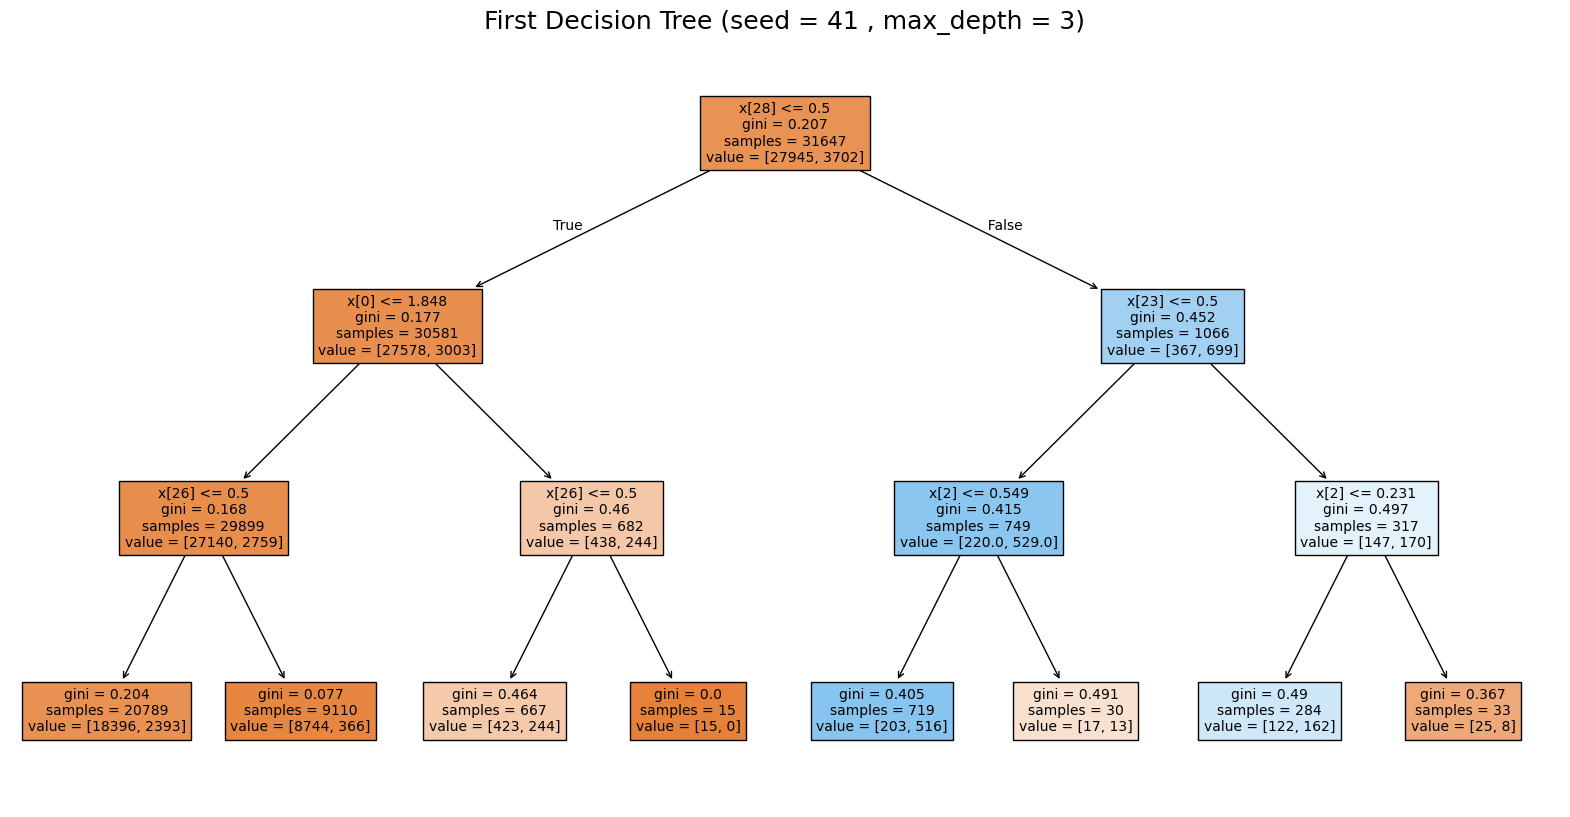

In [18]:
# Decision tree model creation and tree visualization
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
dt_clf_1 = DecisionTreeClassifier(max_depth=3, random_state=41)
dt_clf_1.fit(X_train_prep, y_train)
print("\nFirst Decision Tree (seed=41, max_depth=3):")
y_pred_dt1 = dt_clf_1.predict(X_test_prep)
print(f"Accuracy = {accuracy_score(y_test, y_pred_dt1):.4f}")
print(f"f1-score = {f1_score(y_test, y_pred_dt1):.4f}")

# Visualize tree with max_depth=3
def tree_visu(dt_clf_1, title):
    plt.figure(figsize=(20,10))
    tree.plot_tree(dt_clf_1, filled=True, fontsize=10, max_depth=3)
    plt.title(title, size = 18)
    plt.show()
tree_visu(dt_clf_1, 'First Decision Tree (seed = 41 , max_depth = 3)')

Now, a first model has been created, change the random seed for the train/test split, and create another tree.

This tree should be created with the same hyperparameters than above. 

In [19]:
# create a new train and test dataset with a different seed
print("\n"+"="*60)
print("CREATING A NEW TRAIN AND TEST DATASET WITH A NEW SEED")
print("="*60)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X, 
    y,
    train_size=0.7, 
    random_state=150, 
    stratify=y
)
X_train_prep_2 = preprocessor.fit_transform(X_train_2)
X_test_prep_2 = preprocessor.transform(X_test_2)


CREATING A NEW TRAIN AND TEST DATASET WITH A NEW SEED



SECOND DECISION TREE (SEED=150, MAX_DEPTH = 3)
Accuracy score: 0.8949
f1-score: 0.3030


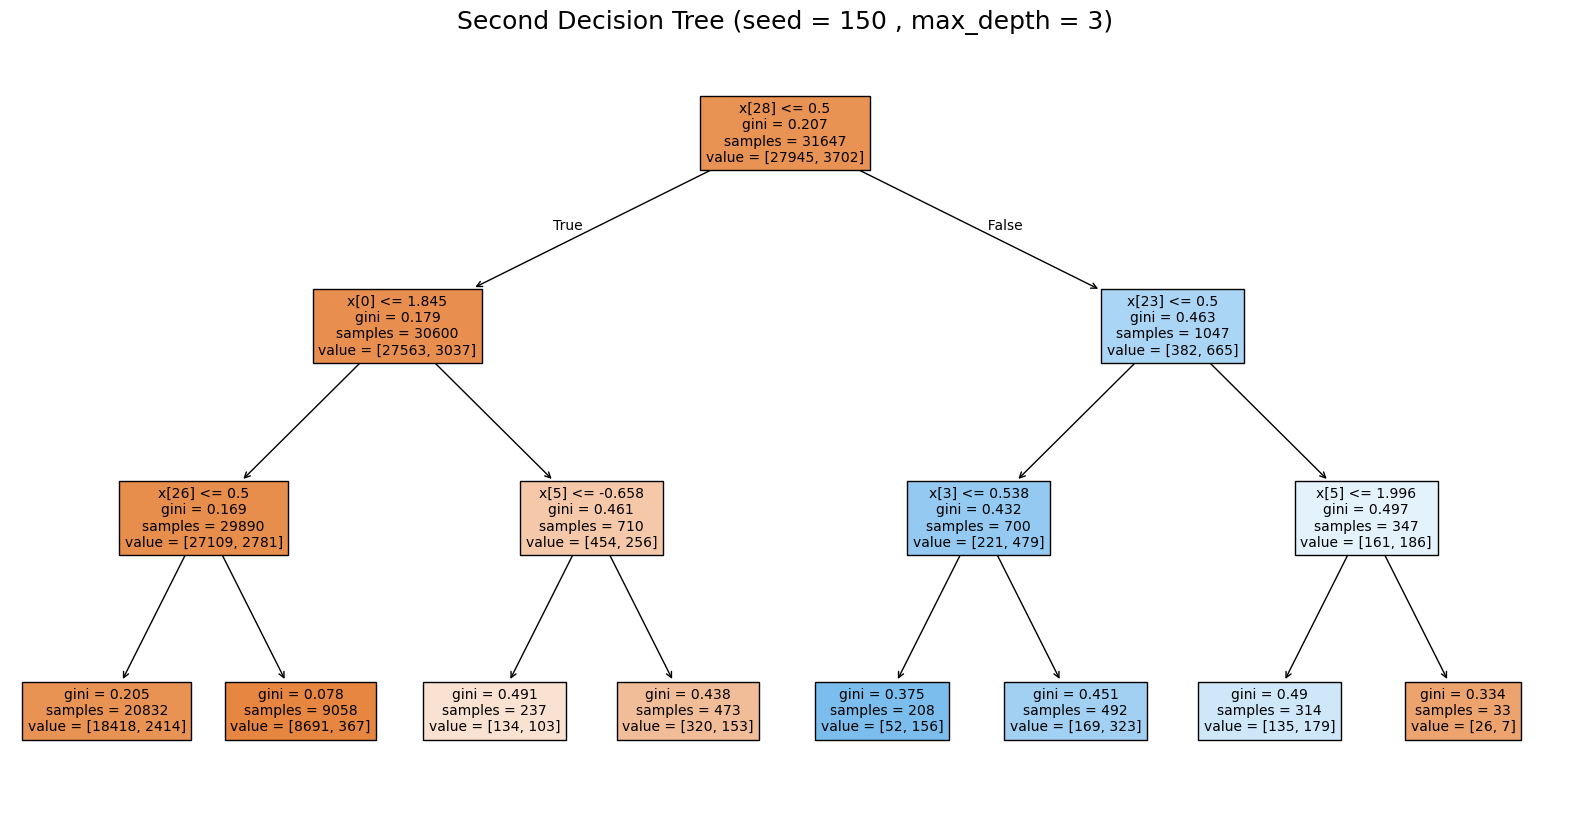

In [20]:
# Second tree creation
dt_clf_2 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_clf_2.fit(X_train_prep_2, y_train_2)
print("\n"+"="*60)
print("SECOND DECISION TREE (SEED=150, MAX_DEPTH = 3)")
print("="*60)
y_pred_dt2 = dt_clf_2.predict(X_test_prep_2)
print(f"Accuracy score: {accuracy_score(y_test_2, y_pred_dt2):.4f}")
print(f"f1-score: {f1_score(y_test_2, y_pred_dt2):.4f}")

# Tree visualization
tree_visu(dt_clf_2, 'Second Decision Tree (seed = 150 , max_depth = 3)')

What can you tell about the two trees?

*`The two trees have different structure and splitting rules which shows dependency on the training dataset and variance in the model`*

Normally, before creating a model, one or more evaluation metrics should be chosen depending on the client problem.

* Choose different metrics that seem relevant to this problem (see previous lesson on Classification)

* Prepare a scoring list for these metrics.

* Use the cross-validation method to measure these metrics (if you need see : [cross validation sklearn](https://scikit-learn.org/stable/modules/cross_validation.html)). 

*Hint:*  the `cross_validate` method allows you to pass a metric list as parameter (see [doc here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) ).


CHECKING TARGET BALANCE
Training set target distribution:
y
0    27945
1     3702
Name: count, dtype: int64

Class proprotion:
y
0    0.883022
1    0.116978
Name: proportion, dtype: float64

 Test set target distribution:
y
0    11977
1     1587
Name: count, dtype: int64

Class proportions:
y
0    0.882999
1    0.117001
Name: proportion, dtype: float64

Imbalance ratio (class 0 : class 1): 7.548622366288493
⚠️ WARNING: Dataset is IMBALANCED!
   Consider using: class_weight = 'balanced', SMOTE, or adjust the evaluation metrics


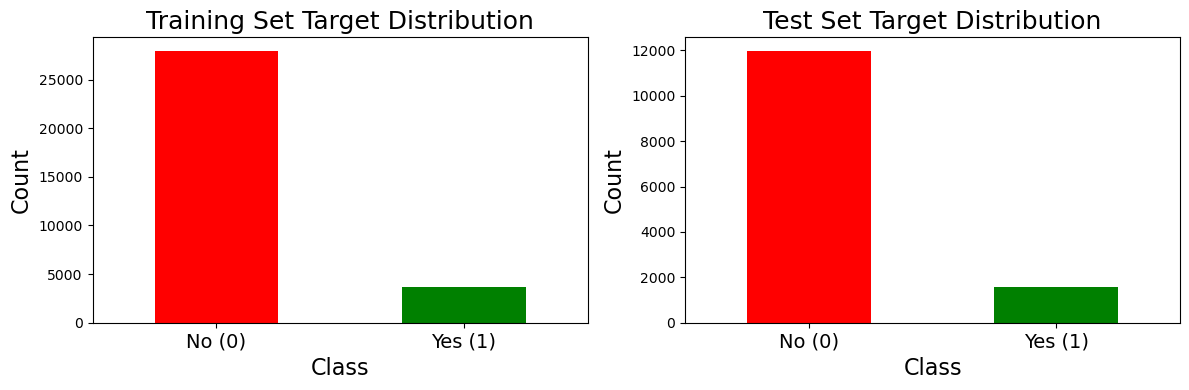

In [21]:
# Test if the target is balanced
print("\n"+"="*60)
print("CHECKING TARGET BALANCE")
print("="*60)
print("Training set target distribution:")
print(y_train.value_counts())
print("\nClass proprotion:")
print(y_train.value_counts(normalize=True))

print("\n Test set target distribution:")
print(y_test.value_counts())
print(f"\nClass proportions:")
print(y_test.value_counts(normalize=True))

#Calculate imbalance ratio
imbalance_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"\nImbalance ratio (class 0 : class 1): {imbalance_ratio}")

if imbalance_ratio > 2 or imbalance_ratio < 0.5:
    print("⚠️ WARNING: Dataset is IMBALANCED!")
    print("   Consider using: class_weight = 'balanced', SMOTE, or adjust the evaluation metrics")
else:
    print("✓ Dataset is reasonably balanced")

# We can visualize the target distribution
fig, axes = plt.subplots(1, 2, figsize = (12, 4))
y_train.value_counts().plot(kind='bar', ax=axes[0], color=['red', 'green'])
axes[0].set_title('Training Set Target Distribution', size = 18)
axes[0].set_xlabel('Class', size = 16)
axes[0].set_ylabel('Count', size = 16)
axes[0].set_xticklabels(['No (0)', 'Yes (1)'], size = 14, rotation=0)

y_test.value_counts().plot(kind='bar', ax=axes[1], color=['red','green'])
axes[1].set_title('Test Set Target Distribution', size = 18)
axes[1].set_xlabel('Class', size = 16)
axes[1].set_ylabel('Count', size = 16)
axes[1].set_xticklabels(['No (0)', 'Yes (1)'], size = 14, rotation=0)
plt.tight_layout()
plt.show()

In [22]:
# Cross validation on Decision trees
from sklearn.model_selection import cross_validate
print("\n"+"="*60)
print("CROSS VALIDATION ON DECISION TREES")
print("="*60)
scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}
cv_results = cross_validate(dt_clf_1, X_train_prep, y_train, cv=5, scoring=scoring)

# store results in a Dataframe
metrics = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
cv_df = pd.DataFrame({
    'Metric': [m.upper() for m in metrics],
    'Mean': [cv_results[f'test_{m}'].mean() for m in metrics],
    'Std': [cv_results[f'test_{m}'].std() for m in metrics]
})
cv_df['Mean'] = cv_df['Mean'].round(3)
cv_df['Std'] = cv_df['Std'].round(3)
print("\nCross-Validation Results (5-fold):")
print("-"*60)

cv_df



CROSS VALIDATION ON DECISION TREES

Cross-Validation Results (5-fold):
------------------------------------------------------------


,Metric,Mean,Std
0,ACCURACY,0.893,0.001
1,F1,0.277,0.015
2,PRECISION,0.664,0.022
3,RECALL,0.175,0.012
4,ROC_AUC,0.683,0.007


Now process the output of your cross-validation in order to know the diversity in performances and the average performance

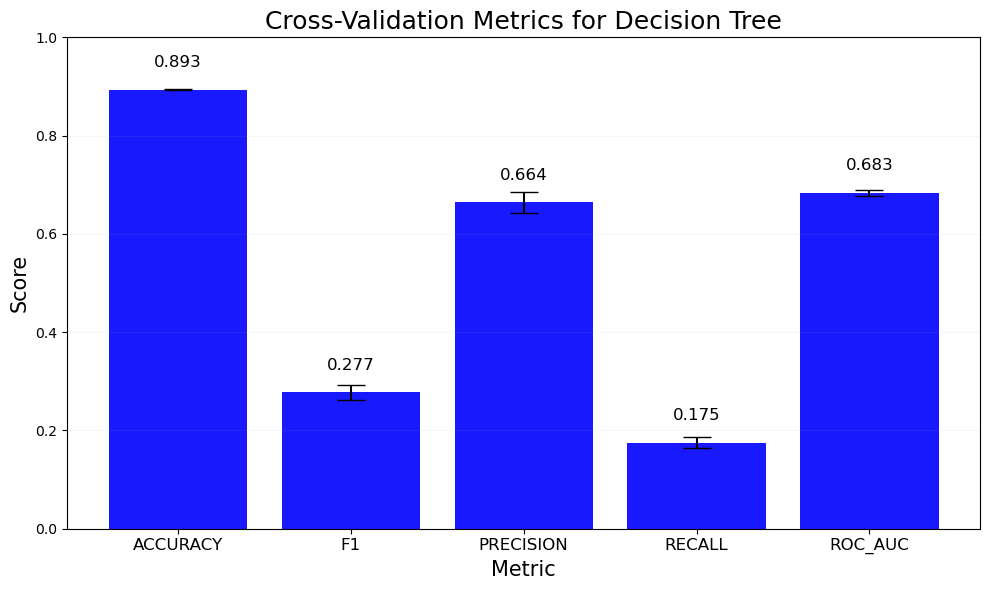

In [23]:
# BONUS: performance plot 
# Create a bar plot showing the mean and the standard deviation for each metric
# Plot metrics

plt.figure(figsize=(10, 6))
x_pos = np.arange(len(cv_df))
barhs = plt.bar(x_pos, cv_df['Mean'], yerr=cv_df['Std'], color='blue', alpha=0.9, capsize=10)
plt.xticks(x_pos, cv_df['Metric'], size = 12)
plt.ylabel('Score', size = 15)
plt.xlabel('Metric', size = 15)
plt.title('Cross-Validation Metrics for Decision Tree', size = 18)
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.1)
for bar in barhs:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.04, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

Now choose a single metric to perform a grid search on the `max_depth` of the tree.

In [24]:
# Grid search
from sklearn.model_selection import GridSearchCV
print("\n"+"="*60)
print("GRID SEARCH FOR OPTIMAL MAX_DEPTH OF TREE")
print("="*60)

param_grid = {'max_depth': range(1, 30)}
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=41),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
dt_grid.fit(X_train_prep, y_train)
print(f"Best max_depth: {dt_grid.best_params_['max_depth']}")
print(f"Best CV F1-Score: {dt_grid.best_score_:.4f}")


GRID SEARCH FOR OPTIMAL MAX_DEPTH OF TREE
Best max_depth: 17
Best CV F1-Score: 0.3462


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [25]:
# Test metrics
from sklearn.metrics import precision_score, recall_score, roc_auc_score
print("\n"+"="*60)
print("EVALUATION ON TEST DATA")
print("="*60)
best_dt = dt_grid.best_estimator_
y_pred_best_dt = best_dt.predict(X_test_prep)
y_probab_best_dt = best_dt.predict_proba(X_test_prep)[:, 1]
test_score_df = pd.DataFrame({
    'Accuracy': [round(accuracy_score(y_test, y_pred_best_dt), 3)],
    'F1-score': [round(f1_score(y_test, y_pred_best_dt), 3)],
    'Precision': [round(precision_score(y_test, y_pred_best_dt),3)],
    'Recall': [round(recall_score(y_test, y_pred_best_dt),3)],
    'ROC-AUC': [round(roc_auc_score(y_test, y_pred_best_dt),3)] 
})
test_score_df



EVALUATION ON TEST DATA


,Accuracy,F1-score,Precision,Recall,ROC-AUC
0,0.879,0.348,0.47,0.276,0.617


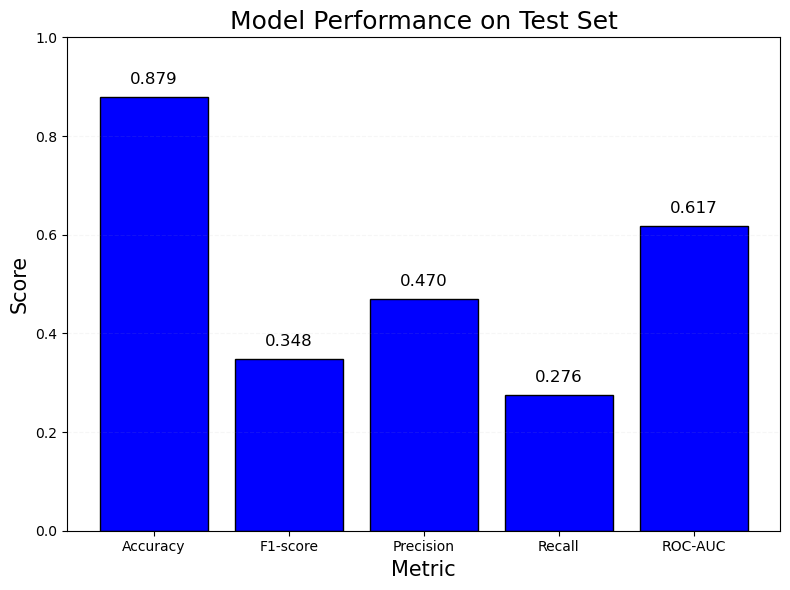

In [26]:
# Convert the dataframe to long format for easy plotting
metrics = test_score_df.T  # transpose so metrics are rows
metrics.columns = ['Score']  # name the column
metrics = metrics.round(4)   # round to 4 decimal places

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics.index, metrics['Score'], color='blue', edgecolor='black')
plt.ylim(0, 1)
plt.title('Model Performance on Test Set', fontsize=18)
plt.ylabel('Score', size = 15)
plt.xlabel('Metric', size = 15)
plt.grid(axis='y', linestyle='--', alpha=0.1)

# Add text labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

What are your observation?  
By looking at the metric results, what is strange? Or at the opposite, obvious?

<div style="background-color:#e3f2fd; color:#0d47a1; padding:10px; border-radius:8px;">
<b> Observations</b>

* It is strange that accuracy is very high while recall is very low.

* It's obvious that the model is not useful for marketing.
</div>


From theses observations, what are your conclusions?  
<div style="background-color:#e3f2fd; color:#0d47a1; padding:10px; border-radius:8px;">
<b> Conclusions:</b> 

* The recall is too low meaning that the model would fail to identify valuable leads. 

* The Decision Tree is not performing well for the business goal.

* The ROC-AUC ($\approx 0.62$) shows a weak ability to distinguish 'yes' vs 'no' customers.
</div>

In the next sessions, we will look at ensembling to improve performances. But what should you be suspicious? What are the potential risks you identified?  

<div style="background-color:#e3f2fd; color:#0d47a1; padding:10px; border-radius:8px;">
<b> What to be suspicious of:</b> 

* Class imbalance as shown in the target plot above. 

* Overfitting risk as Decision Tree can overfit noise when there are too many features.

* Accuracy should not be used as a metric measure rather, we can use ROC-AUC, or f&-score. We can also prioritize recal if the bank's cost of missing a 'yes' is high.
</div>


Propose something, continue to the next section and change your conclusions if you need.

<div style="background-color:#e3f2fd; color:#0d47a1; padding:10px; border-radius:8px;">
<b> Proposition:</b> 

* I propose to use `class_weighted='balanced` to handle the imbalanced data and then compare the result.
</div>


In [27]:
print("\n"+"="*60)
print("GRID SEARCH WITH class_weight='balanced")
print("="*60)
dt_grid_balanced = GridSearchCV(
    DecisionTreeClassifier(random_state=41, class_weight='balanced'),
    param_grid,
    cv = 5,
    scoring='f1',
    n_jobs=-1
)
dt_grid_balanced.fit(X_train_prep, y_train)
print(f'Best max_depth: {dt_grid_balanced.best_params_['max_depth']}')
print(f"Best CV f1-score: {dt_grid_balanced.best_score_:.3f}")

# Evaluate on Test data
best_dt_balanced = dt_grid_balanced.best_estimator_
y_pred_best_dt_balanced = best_dt_balanced.predict(X_test_prep)
y_probab_best_dt_balanced = best_dt_balanced.predict_proba(X_test_prep)[:,1]

# Compare with and without class_weight='balanced'
comparison_df = pd.DataFrame({
    'Without class_weight': {
        'Accuracy': round(accuracy_score(y_test, y_pred_best_dt), 3),
        'F1-score': round(f1_score(y_test, y_pred_best_dt), 3),
        'Precision': round(precision_score(y_test, y_pred_best_dt),3),
        'Recall': round(recall_score(y_test, y_pred_best_dt),3),
        'ROC-AUC': round(roc_auc_score(y_test, y_pred_best_dt),3)
    },
    'With class_weight': {
        'Accuracy': round(accuracy_score(y_test, y_pred_best_dt_balanced), 3),
        'F1-score': round(f1_score(y_test, y_pred_best_dt_balanced), 3),
        'Precision': round(precision_score(y_test, y_pred_best_dt_balanced),3),
        'Recall': round(recall_score(y_test, y_pred_best_dt_balanced),3),
        'ROC-AUC': round(roc_auc_score(y_test, y_pred_best_dt_balanced),3)
    }
})
comparison_df


GRID SEARCH WITH class_weight='balanced
Best max_depth: 6
Best CV f1-score: 0.438


,Without class_weight,With class_weight
Accuracy,0.879,0.870
F1-score,0.348,0.461
Precision,0.470,0.447
Recall,0.276,0.476
ROC-AUC,0.617,0.699


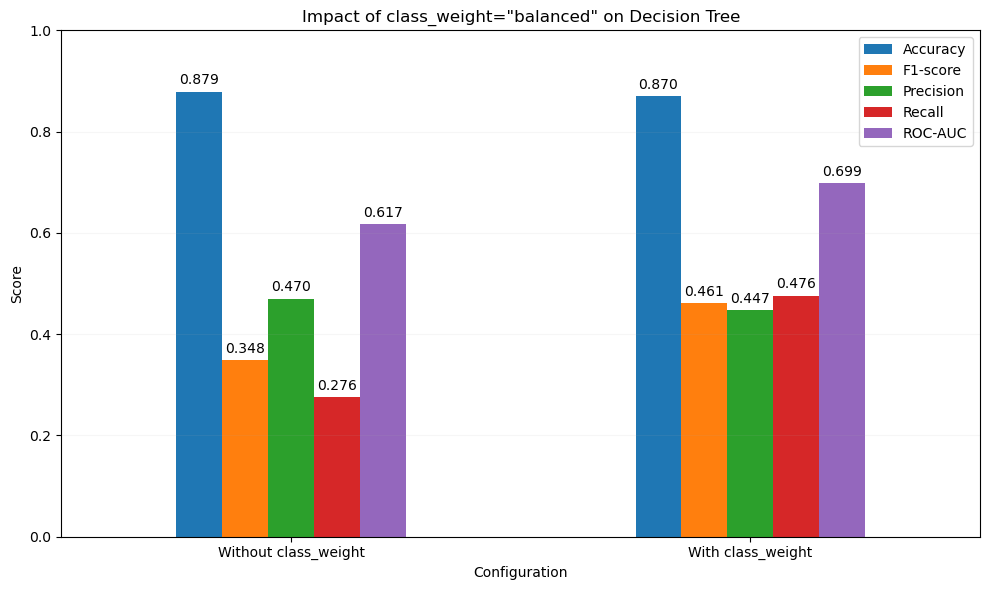

In [28]:
barhh = comparison_df.T.plot(kind='bar', figsize=(10, 6), rot=0)
plt.xlabel('Configuration')
plt.ylabel('Score')
plt.title('Impact of class_weight="balanced" on Decision Tree')
plt.legend(loc='upper right')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.1)

# Loop through each bar container (for grouped bars)
for container in barhh.containers:
    # Add labels to each bar
    barhh.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()


<div style="background-color:#e3f2fd; color:#0d47a1; padding:10px; border-radius:8px;">
<b> Observation:</b> 

using the `class_weight=balanced` 

* Increases recall (catches more positives). 

* It also decreases slightly the precision.

* F1-score is expected to improve as it balances precision and recall

* Decreases accuracy slightly, although it is misleading for imbalanced data.
</div>

### Introducing Ensemble Learning with Bagging models.

Let's train multiple classifiers in parallel in a bootstraping approach! 

Bagging stands for ***Boostrap AGGregatING***.

The following [post](https://blog.octo.com/les-methodes-ensemblistes-pour-algorithmes-de-machine-learning/) will give you an overview of these methods and their advantages and drawbacks

**The train test split using a seed equals to 42 will be used in the following part**

In [29]:
# train_test split (you can copy paste the previously declared cell)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.7,
    stratify=y, 
    random_state=42
)
print(f"\nTrain set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Train set: 31647 samples
Test set: 13564 samples


In [30]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

#### Using Random Forest

The concept of random forest is explained in this [post](https://medium.com/analytics-vidhya/understanding-the-random-forest-algorithm-79b87bdde79a).

Now the best parameters of the previous classifier will be used in a using a bagging classifier
[sklearn : Random Forest Doc](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=random%20forest#sklearn.ensemble.RandomForestClassifier)

We will use grid search on the `n_estimators` and `max_depth` parameters. 

In [31]:
# gridsearch for the Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
print("\n"+"="*60)
print("RANDOM FOREST CLASSIFIER (BAGGING)")
print("="*60)
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, 15, 20, 25, 30]
}
rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1, class_weight='balanced'),
    rf_param_grid,
    cv=5, 
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train_prep, y_train)


RANDOM FOREST CLASSIFIER (BAGGING)
Fitting 5 folds for each of 49 candidates, totalling 245 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [3, 5, ...], 'n_estimators': [10, 50, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


In [32]:
print(f"\nBest parameters: {rf_grid.best_params_}")
print(f"Best CV F1-Score: {rf_grid.best_score_:.4f}")


Best parameters: {'max_depth': 15, 'n_estimators': 400}
Best CV F1-Score: 0.4309


How much estimators should we use for obtaining an optimal result? (in terms of time and performance)



*`For optimal results, we should use 400 estimators with max_depth = 15. This balances performance and computational cost.`*

Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [33]:
# Test metrics
# retrieve the best estimator
best_rf = rf_grid.best_estimator_

# Retrain it on the entire training set
best_rf.fit(X_train_prep, y_train)

# Evaluating the selected model on the test set
y_pred_best_rf = best_rf.predict(X_test_prep)
y_probab_best_rf = best_rf.predict_proba(X_test_prep)[:,1]

 #Store RF results
rf_test_results = pd.DataFrame({
    'accuracy': [round(accuracy_score(y_test, y_pred_best_rf), 3)],
    'f1': [round(f1_score(y_test, y_pred_best_rf),3)],
    'precision': [round(precision_score(y_test, y_pred_best_rf),3)],
    'recall': [round(recall_score(y_test, y_pred_best_rf),3)],
    'roc_auc': [round(roc_auc_score(y_test, y_pred_best_rf),3)]
})

rf_test_results


,accuracy,f1,precision,recall,roc_auc
0,0.872,0.455,0.453,0.457,0.692


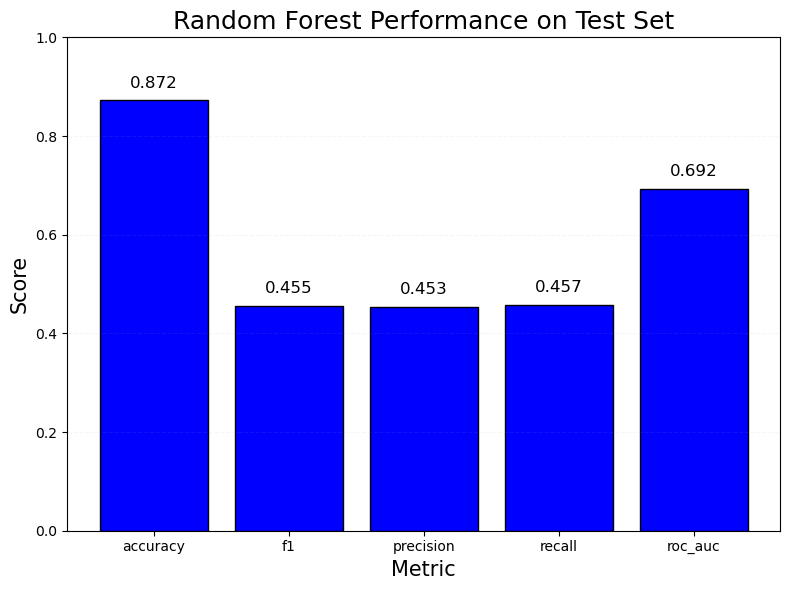

In [34]:
# Convert the dataframe to long format for easy plotting
metric = rf_test_results.T  # transpose so metrics are rows
metric.columns = ['Score']  # name the column
metric = metric.round(4)   # round to 4 decimal places

# Plot the bar chart
plt.figure(figsize=(8, 6))
barrs = plt.bar(metric.index, metric['Score'], color='blue', edgecolor='black')
plt.ylim(0, 1)
plt.title('Random Forest Performance on Test Set', fontsize=18)
plt.ylabel('Score', size = 15)
plt.xlabel('Metric', size = 15)
plt.grid(axis='y', linestyle='--', alpha=0.1)

# Add text labels on top of bars
for bar in barrs:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

#### Other Random Forest effect

The random forest model can attribute an importance value to features, [explanations here](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

Let's train another random forest and display an histogramm with it :


IMPORTANT FEATURE ANALYSIS

Top 10 Most Important Features:
1. dayoftheyear: 0.1846
2. balance: 0.1355
3. age: 0.1199
4. poutcome_success: 0.0756
5. contact_unknown: 0.0717
6. pdays: 0.0638
7. campaign: 0.0610
8. housing_yes: 0.0530
9. previous: 0.0339
10. marital_married: 0.0199


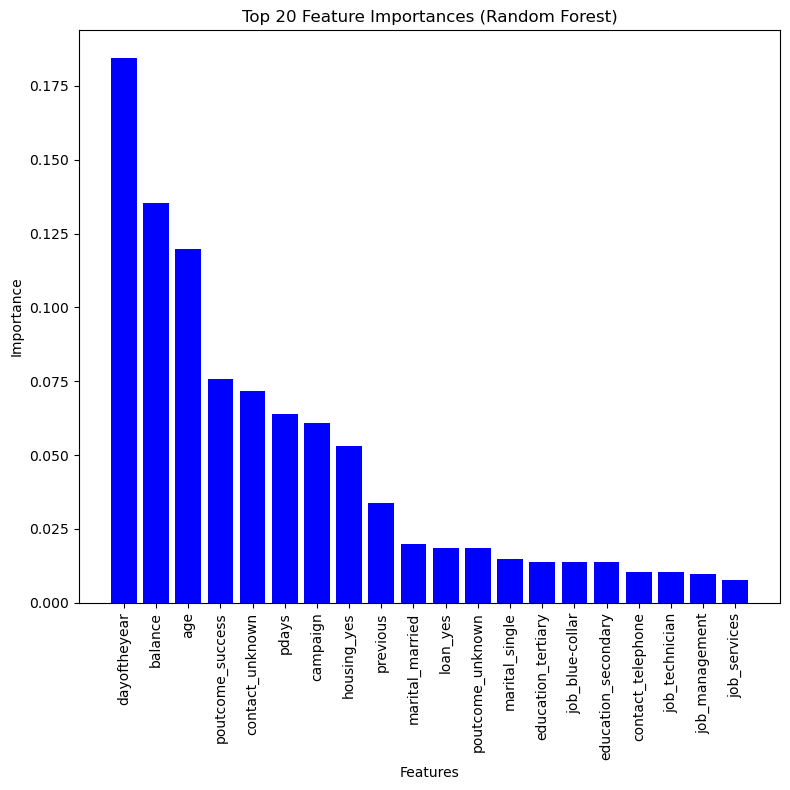

In [35]:
# display features' importance => use the RandomForest Object
print("\n"+"="*60)
print("IMPORTANT FEATURE ANALYSIS")
print("="*60)
feature_names = (numerical_features + 
                list(preprocessor.named_transformers_['category']
                    .get_feature_names_out(categorical_features)))

# Get feature importances
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("\nTop 10 Most Important Features:")
for i in range(min(10, len(feature_names))):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

# Plot feature importances
plt.figure(figsize=(8, 8))
plt.bar(range(min(20, len(importances))), importances[indices][:20], color='blue')
plt.xticks(range(min(20, len(importances))), 
           [feature_names[i] for i in indices[:20]], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 20 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

In [36]:
most_important = feature_names[indices[0]]
most_important

'dayoftheyear'

What is the most important feature?

*`dayoftheyear`*

A lot of features have low importance and probably add noise which reduce the performance of the classifier, do a feature selection by recursive elemination to automatically select the subset of features that gives you the best model predictions.

You can have a look at : 

https://scikit-learn.org/stable/modules/feature_selection.html

https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py


RECURSIVE FEATURE ELIMINATION

Optimal number of features: 6
CV Score with selected features: 0.283


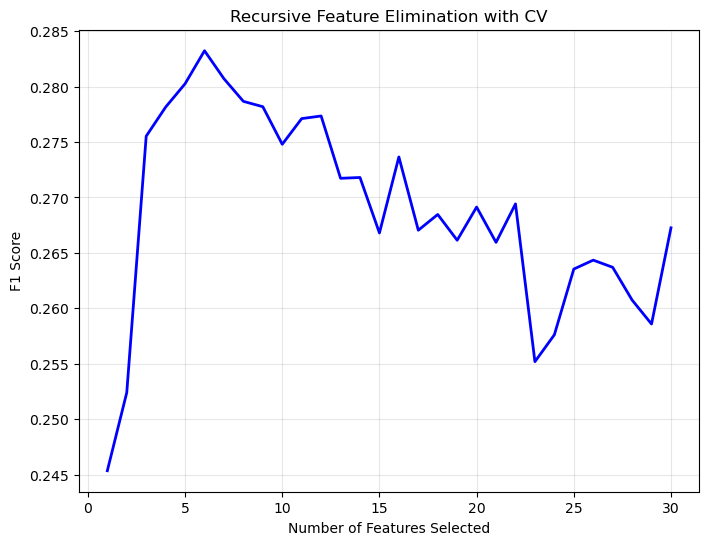

In [ ]:
# Feature selection with recursive elimination
# Do another grid search on your model with the subset of selected features
from sklearn.feature_selection import RFECV
print("\n"+"="*60)
print("RECURSIVE FEATURE ELIMINATION")
print("="*60)

rfcv = RFECV(
    estimator=RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1),
    step = 1,
    cv = 3,
    scoring='f1',
    n_jobs=-1
)

rfcv.fit(X_train_prep, y_train)

print(f"\nOptimal number of features: {rfcv.n_features_}")
print(f"CV Score with selected features: {rfcv.cv_results_['mean_test_score'].max():.3f}")

# Plot number of features vs. CV score
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfcv.cv_results_['mean_test_score']) + 1),
         rfcv.cv_results_['mean_test_score'], color = 'blue', linewidth=2)
plt.xlabel('Number of Features Selected')
plt.ylabel('F1 Score')
plt.title('Recursive Feature Elimination with CV')
plt.grid(alpha=0.3)
plt.show()

In [38]:
# Train RF with selected features
X_train_selected = rfcv.transform(X_train_prep)
X_test_selected = rfcv.transform(X_test_prep)

rf_selected = RandomForestClassifier(
    n_estimators=rf_grid.best_params_['n_estimators'],
    max_depth=rf_grid.best_params_['max_depth'],
    random_state=42,
    n_jobs=-1
)
rf_selected.fit(X_train_selected, y_train)

y_pred_rf_selected = rf_selected.predict(X_test_selected)
print(f"\nTest F1-Score with feature selection: {f1_score(y_test, y_pred_rf_selected):.3f}")


Test F1-Score with feature selection: 0.331


We removed the duration feature in our dataset

Read this feature description on the dataset description ([here on data.world](https://data.world/uci/bank-marketing) or [here on kaggle](https://www.kaggle.com/janiobachmann/bank-marketing-dataset)).

How would the previously trained models perform with this feature?

*`With the duration feature, model will achieve near-perfect as duration strongly predicts subscription. However, this creates data leakage since we can't know the duration of a call before it is made. Inserting the feature into our model will mean that our model is peeking into the future.`*

### Continue Ensemble Learning with boosting techniques

Bagging permits to average the results of separated models, whereas the boosting technique trains a classifier and optimizes it in function of its error.

Some information about boosting techniques are on the [sklearn documentation](https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting) but a commonly used library for these techniques is [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html) there are some compatibilities with the sklearn methods (gridsearch, cross validation,...)

- install the `xgboost` package

*Read the articles in resources for a complete explanation.*

In this part a classifier will be trained and evaluated.

In [39]:
# use the same split and seed than you used before
# normally, you have nothing to code here :D 

*Hint:* An example for integrating `XGBoost` with  the `sklearn` tools is available [here](https://medium.com/@juniormiranda_23768/ensemble-methods-tuning-a-xgboost-model-with-scikit-learn-54ff669f988a)

In [40]:
import xgboost as xgb

print("\n"+"="*60)
print("XGBOOST CLASSIFIER (BOOSTING)")
print("="*60)

# Calculate scale_pos_weight for XGBoost (equivalent to class_weight = 'balanced' we have seen before)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight:.2f}")


XGBOOST CLASSIFIER (BOOSTING)
Calculated scale_pos_weight for XGBoost: 7.55


Let's build a new model than before with a grid search on the `n_estimators` and `max_depth` parameters.

In [41]:
# model building and evaluation
print("\n1. Initial XGBoost Model")
print("-"*60)

xgb_basic = xgb.XGBClassifier(
    n_estimators = 100,
    max_depth = 5,
    learning_rate = 0.1,
    random_state = 42,
    eval_metric = 'logloss',
    scale_pos_weight = scale_pos_weight 
)
# Fit and evaluate basic model
xgb_basic.fit(X_train_prep, y_train)
y_pred_xgb_basic = xgb_basic.predict(X_test_prep)
y_probab_xgb_basic = xgb_basic.predict_proba(X_test_prep)[:,1]

print("Basic XGBoost Performance (n_estimators=100, max_depth=5, lr=0.1):")
xgb_basic_metric = pd.DataFrame({

    'Accuracy':  [round(accuracy_score(y_test, y_pred_xgb_basic),3)],
    'F1-Score':  [round(f1_score(y_test, y_pred_xgb_basic),3)],
    'Precision': [round(precision_score(y_test, y_pred_xgb_basic),3)],
    'Recall':    [round(recall_score(y_test, y_pred_xgb_basic),3)],
    'ROC-AUC':   [round(roc_auc_score(y_test, y_probab_xgb_basic),3)]
})
xgb_basic_metric


1. Initial XGBoost Model
------------------------------------------------------------
Basic XGBoost Performance (n_estimators=100, max_depth=5, lr=0.1):


,Accuracy,F1-Score,Precision,Recall,ROC-AUC
0,0.817,0.449,0.347,0.638,0.797


In [42]:
# Cross-validation on basic model
print("\nCross-Validation Results (5-fold):")
cv_scores_xgb = cross_validate(xgb_basic, X_train_prep, y_train, cv=5, 
                                scoring={'f1': 'f1', 'roc_auc': 'roc_auc'})
print(f"F1-Score:  {cv_scores_xgb['test_f1'].mean():.3f} (+/- {cv_scores_xgb['test_f1'].std():.3f})")
print(f"ROC-AUC:   {cv_scores_xgb['test_roc_auc'].mean():.3f} (+/- {cv_scores_xgb['test_roc_auc'].std():.3f})")



Cross-Validation Results (5-fold):
F1-Score:  0.444 (+/- 0.012)
ROC-AUC:   0.798 (+/- 0.005)


In [43]:
# gridsearch 
print("\n2. Grid Search for Optimal Hyperparameters:")
print("-"*60)
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

# XGBoost uses scale_pos_weight instead of class_weight
xgb_clf = xgb.XGBClassifier(
    random_state=42, 
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight  # Handles class imbalance
)

xgb_grid = GridSearchCV(
    xgb_clf,
    xgb_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
xgb_grid.fit(X_train_prep, y_train)

print(f"\nBest parameters: {xgb_grid.best_params_}")
print(f"Best CV F1-Score: {xgb_grid.best_score_:.4f}")


2. Grid Search for Optimal Hyperparameters:
------------------------------------------------------------
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best CV F1-Score: 0.4488


Now retrain the model with the selected hyperparameters on your whole train set and evaluate the selected model on the test set :

In [44]:
# Test metrics
# Evaluate on test set
best_xgb = xgb_grid.best_estimator_
y_pred_xgb = best_xgb.predict(X_test_prep)
y_proba_xgb = best_xgb.predict_proba(X_test_prep)[:, 1]

# Store XGB results
xgb_test_results = pd.DataFrame({
    'accuracy': [round(accuracy_score(y_test, y_pred_xgb),3)],
    'f1': [round(f1_score(y_test, y_pred_xgb),3)],
    'precision': [round(precision_score(y_test, y_pred_xgb),3)],
    'recall': [round(recall_score(y_test, y_pred_xgb),3)],
    'roc_auc':[round(roc_auc_score(y_test, y_proba_xgb),3)]
})
xgb_test_results

,accuracy,f1,precision,recall,roc_auc
0,0.831,0.464,0.369,0.624,0.793


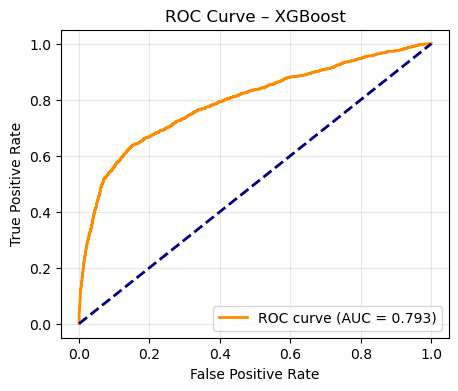

In [45]:
# performance curves
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(5, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – XGBoost')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

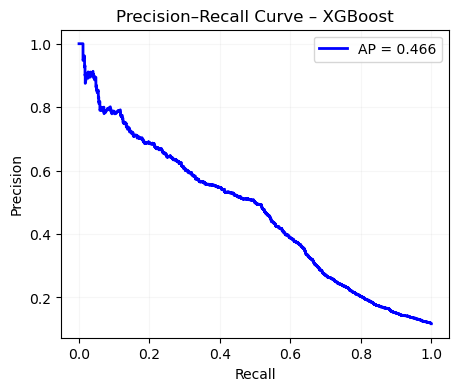

In [46]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_proba_xgb)
ap = average_precision_score(y_test, y_proba_xgb)

plt.figure(figsize=(5, 4))
plt.plot(recall, precision, lw=2, color='blue', label=f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve – XGBoost')
plt.legend()
plt.grid(alpha=0.1)
plt.show()


## Let's Conclude

Report your test set metrics for the three methods here

In [47]:
# Report on the metric for Decision tree, Random Forest, and XGBoost
import pandas as pd

# --- Rename metric columns safely (only first 5) ---
test_score_df.rename(columns={
    list(test_score_df.columns)[0]: 'Accuracy',
    list(test_score_df.columns)[1]: 'F1-score',
    list(test_score_df.columns)[2]: 'Precision',
    list(test_score_df.columns)[3]: 'Recall',
    list(test_score_df.columns)[4]: 'ROC-AUC'
}, inplace=True)

rf_test_results.rename(columns={
    list(rf_test_results.columns)[0]: 'Accuracy',
    list(rf_test_results.columns)[1]: 'F1-score',
    list(rf_test_results.columns)[2]: 'Precision',
    list(rf_test_results.columns)[3]: 'Recall',
    list(rf_test_results.columns)[4]: 'ROC-AUC'
}, inplace=True)

xgb_basic_metric.rename(columns={
    list(xgb_basic_metric.columns)[0]: 'Accuracy',
    list(xgb_basic_metric.columns)[1]: 'F1-score',
    list(xgb_basic_metric.columns)[2]: 'Precision',
    list(xgb_basic_metric.columns)[3]: 'Recall',
    list(xgb_basic_metric.columns)[4]: 'ROC-AUC'
}, inplace=True)

# --- Add model names ---
test_score_df['Model'] = 'Decision Tree'
rf_test_results['Model'] = 'Random Forest'
xgb_basic_metric['Model'] = 'XGBoost'

# --- Combine all results ---
combined_results = pd.concat([test_score_df, rf_test_results, xgb_basic_metric], ignore_index=True)

# --- Set model name as index ---
combined_results = combined_results.set_index('Model')

# --- Display final results ---
combined_results


,Accuracy,F1-score,Precision,Recall,ROC-AUC
Model,,,,,
Decision Tree,0.879,0.348,0.470,0.276,0.617
Random Forest,0.872,0.455,0.453,0.457,0.692
XGBoost,0.817,0.449,0.347,0.638,0.797


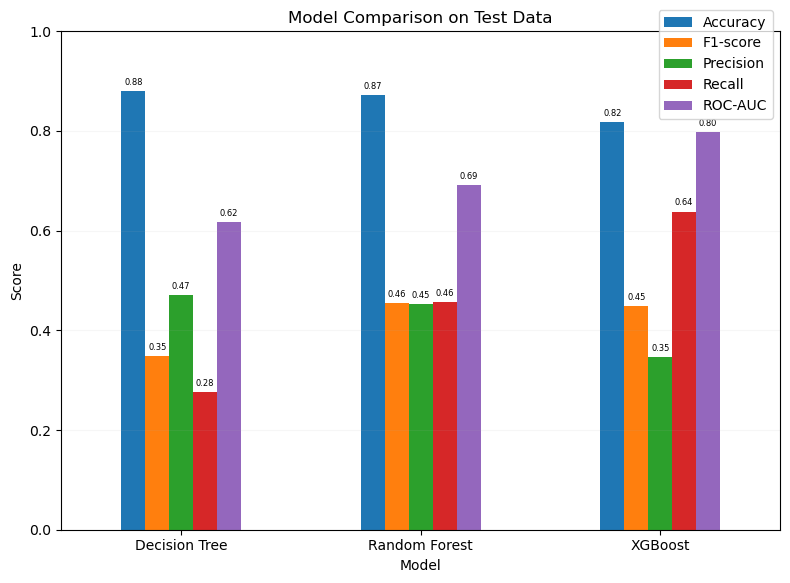

In [58]:
# Random forest on test set
barrhs = combined_results.plot(kind='bar', figsize=(8,6), rot=0)
plt.title('Model Comparison on Test Data')
plt.ylabel('Score')
plt.ylim([0, 1])
plt.grid(axis='y', alpha=0.1)
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.81))
# Loop through each bar container (for grouped bars)
for container in barrhs.containers:
    # Add labels to each bar
    barrhs.bar_label(container, fmt='%.2f', label_type='edge', fontsize=6, padding=3)

plt.tight_layout()
plt.show()


What do you notice? What are you real conclusion about the dataset? What should you tell the client about the dataset and his problem?

<div style="background-color:#e3f2fd; color:#0d47a1; padding:10px; border-radius:8px;">
<b> Observation:</b> 

* The Decision Tree is the weakest overall — high accuracy but poor recall and F1, suggesting overfitting or inability to generalize.

* The Random Forest improves slightly but still doesn’t capture enough positives.

* The XGBoost model clearly performs best overall, particularly in ROC-AUC and recall, which are important when identifying rare positive events (e.g., customers likely to subscribe as in the case of our data).
</div>

<div style="background-color:#e3f2fd; color:#0d47a1; padding:10px; border-radius:8px;">
<b> Conclusion about Dataset:</b> 

- The dataset is HIGHLY IMBALANCED ($\approx 88\%$ 'no', $\approx 12\%$ 'yes').

- This explains why accuracy is high but F1-score is lower.

- The bank should focus on F1-score or precision/recall trade-off.
</div>

<div style="background-color:#e3f2fd; color:#0d47a1; padding:10px; border-radius:8px;">
<b> Dataset Problems and Solution:</b> 

* Monitor for overfitting - use cross-validation.
* Consider cost of false positives vs false negatives.
* Retrain regularly as customer behavior changes over time.
</div>

- Write your memo about bagging and boosting method in a cell below.
- Which model would you choose for the bank, and why? Which precautions?

you can add your models result visualization in this cell if it helps you explaining your conclusions.

`BAGGING (Random Forest):`

- Trains multiple models in PARALLEL on different subsets
- Reduces VARIANCE by averaging predictions
- Good for high-variance models (deep trees)
- Less prone to overfitting

`BOOSTING (XGBoost)`

- Trains models SEQUENTIALLY, each correcting previous errors
- Reduces BIAS by focusing on misclassified samples
- Often achieves better performance
- More prone to overfitting if not regularized

**CHOSEN MODEL:** XGBoost with class_weight='balanced' 

**WHY:** An averagely better F1-score as the Bagging Model, handles imbalance, and captures complex patterns.


## To go further

### Build a customized bagging classifier (Optional) 

- Use a different classification model you have seen until now and build a new classifier based on the [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) to create and train an new model.
- Use differents classification models and use the [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) to create and train a new model.

In [53]:
# Write your code here
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, VotingClassifier

print("\n"+"="*60)
print("CUSTOM BAGGING AND VOTING")
print("="*60)

print('\n1. Bagging Classifier with SVM:')
bagging_svm = BaggingClassifier(
    estimator=SVC(probability=True, random_state=42, class_weight='balanced'),
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)
bagging_svm.fit(X_train_prep, y_train)
y_predict_bagging = bagging_svm.predict(X_test_prep)

y_probab_bagging = bagging_svm.predict_proba(X_test_prep)[:,1]



CUSTOM BAGGING AND VOTING

1. Bagging Classifier with SVM:


In [54]:
bagging_score = pd.DataFrame({

    'Accuracy':  [round(accuracy_score(y_test, y_predict_bagging),3)],
    'F1-Score':  [round(f1_score(y_test, y_predict_bagging),3)],
    'Precision': [round(precision_score(y_test, y_predict_bagging), 3)],
    'Recall':    [round(recall_score(y_test, y_predict_bagging), 3)],
    'ROC-AUC':   [round(roc_auc_score(y_test, y_probab_bagging),3)]
})

bagging_score

,Accuracy,F1-Score,Precision,Recall,ROC-AUC
0,0.885,0.054,0.672,0.028,0.764


In [56]:
# Voting Classifier with multiple models (all with balanced weights)
print("\n2. VotingClassifier (RF + XGB + SVM - all balanced):")
print("-"*60)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, 
                                      random_state=42, class_weight='balanced')),
        ('xgb', xgb.XGBClassifier(n_estimators=100, max_depth=5, random_state=42, 
                                   eval_metric='logloss',
                                   scale_pos_weight=scale_pos_weight)),
        ('svm', SVC(probability=True, random_state=42, class_weight='balanced'))
    ],
    voting='soft',  # Use probability-based voting
    n_jobs=-1 # Use all CPU cores
)

voting_clf.fit(X_train_prep, y_train)
y_predict_voting = voting_clf.predict(X_test_prep)
y_probab_voting = voting_clf.predict_proba(X_test_prep)[:, 1]


2. VotingClassifier (RF + XGB + SVM - all balanced):
------------------------------------------------------------
Training VotingClassifier (this may take a moment)...


In [57]:
voting_score = pd.DataFrame({

    'Accuracy':  [round(accuracy_score(y_test, y_predict_voting),3)],
    'F1-Score':  [round(f1_score(y_test, y_predict_voting),3)],
    'Precision': [round(precision_score(y_test, y_predict_voting), 3)],
    'Recall':    [round(recall_score(y_test, y_predict_voting), 3)],
    'ROC-AUC':   [round(roc_auc_score(y_test, y_probab_voting),3)]
})

voting_score

,Accuracy,F1-Score,Precision,Recall,ROC-AUC
0,0.88,0.483,0.487,0.48,0.796


## Rebalance the data if you haven't done it yet

Before going through the modelling phase, let's see the label distribution :

Use the `value_counts` function and the appropriate visualization for displaying the label distribution

In [ ]:
# code here

What do you notice?

*answer here*

The easiest way to rebalance your data is to add the `class_weight='balanced'` parameter to your scikit learn model. The `class_weight` parameter is available in most scikit-learn models, for example look at the Decision Trees doc :
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

(There are other techniques for rebalancing the data [here](https://blog.octo.com/donnees-desequilibrees-que-faire/), [here](https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) ).

Rebalance the data with the `class_weight` parameter, and you'll have much better f1 and Average Precision metrics.

In [ ]:
# code here